In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

In [2]:
df1 = pd.read_csv('matches.csv')
df2 = pd.read_csv('deliveries.csv')

### 1. Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [3]:
data_df = pd.merge(df1, df2, left_on='id', right_on='match_id', how='inner')

In [4]:
data_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### 2. The column which has the most missing values according to the data is:

In [5]:
missing_val = data_df.isnull().sum()
column_name = missing_val.idxmax()
column_name

'fielder'

### 3. City which hosted most number of seasons according to the data is:

In [6]:
city_season_counts = data_df.groupby('city')['season'].nunique()

city_with_most_seasons = city_season_counts.idxmax()
most_seasons_count = city_season_counts.max()

print(f"The city that hosted the most number of seasons is: {city_with_most_seasons}")
print(f"Number of seasons hosted in this city: {most_seasons_count}")

The city that hosted the most number of seasons is: Delhi
Number of seasons hosted in this city: 11


### 4. Which year has the most number of matches played?

In [7]:
data_df1 = data_df.drop_duplicates(subset=['id', 'date', 'team1', 'team2', 'season', 'city'])

In [8]:
matches_per_year = data_df1.groupby('season')['id'].count()
year_with_most_matches = matches_per_year.idxmax()
most_matches_count = matches_per_year.max()
print(f"The year with the most number of matches played is: {year_with_most_matches}")
print(f"Number of matches played in that year: {most_matches_count}")

The year with the most number of matches played is: 2013
Number of matches played in that year: 76


### 5. Maximum wins by Mumbai Indians in 2011 are

In [9]:
mumbai_indians = data_df1[(data_df1['team1'] == 'Mumbai Indians') | (data_df1['team2'] == 'Mumbai Indians')]
mumbai_indians_2011 = mumbai_indians[data_df['season'] == 2011]
mumbai_wins_2011 = mumbai_indians_2011[mumbai_indians_2011['winner'] == 'Mumbai Indians']

max_wins_2011 = mumbai_wins_2011['winner'].count()

print(f"The maximum number of wins by Mumbai Indians in 2011 is: {max_wins_2011}")

The maximum number of wins by Mumbai Indians in 2011 is: 10


C:\Users\yousu\AppData\Local\Temp\ipykernel_13244\4060165043.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mumbai_indians_2011 = mumbai_indians[data_df['season'] == 2011]


### 6. For 'toss_decision' feature what kind of plot is suitable?

### Count plot, Bar Plot and Pie plot

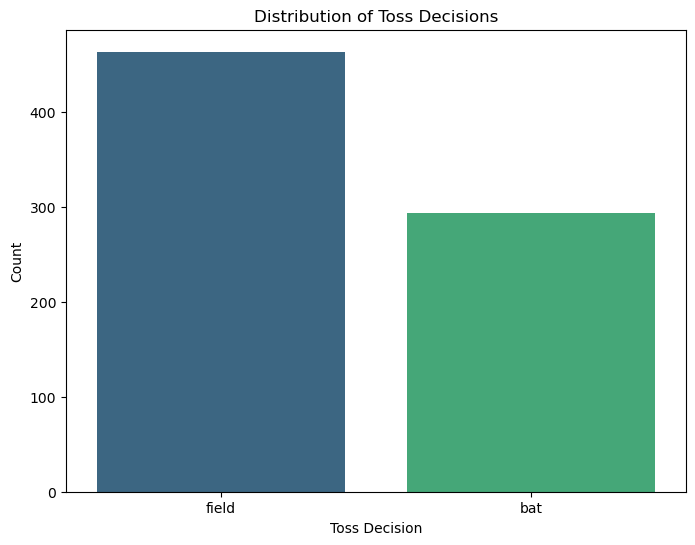

In [10]:
toss_decision_counts = data_df1['toss_decision'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=data_df1, order=toss_decision_counts.index, palette='viridis')
plt.title('Distribution of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

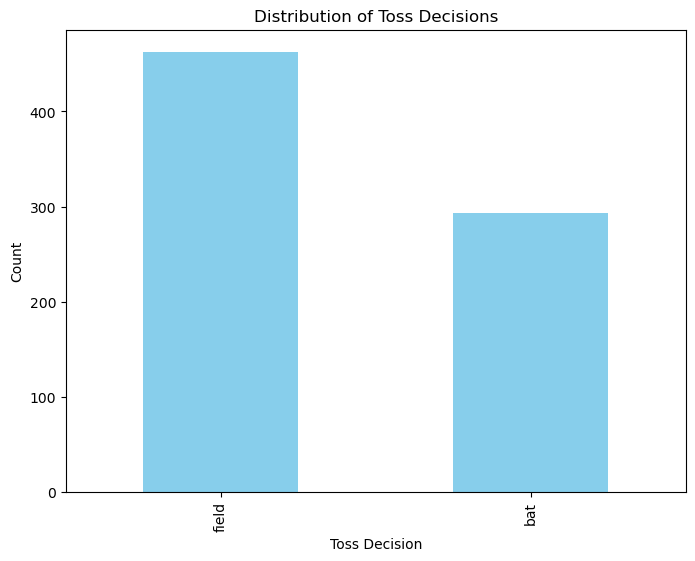

In [11]:
plt.figure(figsize=(8, 6))
toss_decision_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

### 7.  What is the percentage of getting bat and field in feature 'toss_descision'?

In [12]:
toss_decision = data_df1['toss_decision'].value_counts()

percentage_bat = (toss_decision['bat'] / len(data_df1)) * 100
percentage_field = (toss_decision['field'] / len(data_df1)) * 100

print(f"Percentage of 'bat': {percentage_bat:.2f}%")
print(f"Percentage of 'field': {percentage_field:.2f}%")

Percentage of 'bat': 38.76%
Percentage of 'field': 61.24%


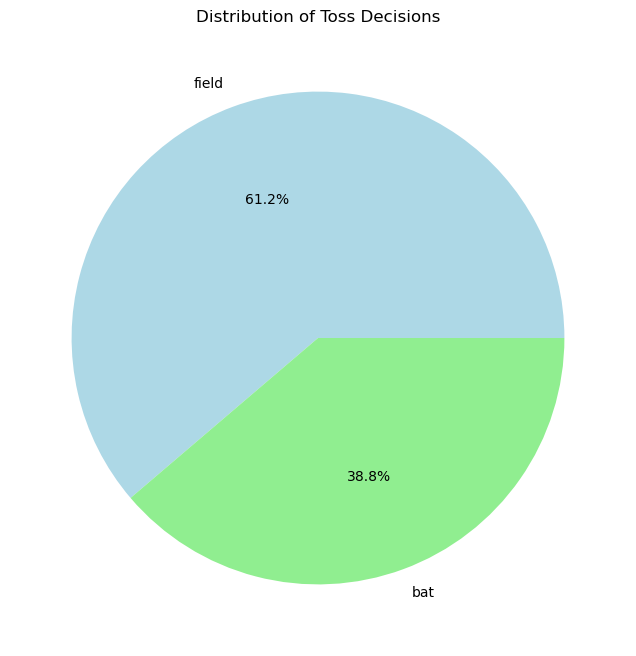

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(toss_decision, labels=toss_decision.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Toss Decisions')
plt.show()

### 8.  Which statement holds true
  
- A) Teams winning tosses and electing field first have won more number of matches.
- B) Teams winning tosses and electing bat first have won more number of matches.
- C) Both A and B
- D) None of the above

#### D) None of the above

### 9. In which years where taking batting second have won more number of matches?

In [14]:
batting_second_wins = data_df1[data_df1['toss_decision'] == 'field']

batting_second_wins_by_year = batting_second_wins[batting_second_wins['winner'].notnull()]
batting_second_wins_count_by_year = batting_second_wins_by_year.groupby('season')['winner'].count()

years_with_most_wins = batting_second_wins_count_by_year.nlargest(3)
print(f"In the year {years_with_most_wins}, teams batting second won the most matches.")

In the year season
2018    50
2016    49
2019    49
Name: winner, dtype: int64, teams batting second won the most matches.


### 10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?

#### Line Plot

### 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [15]:
df_2019 = data_df[data_df['season'] == 2019]
df_boundaries = df_2019[df_2019['batsman_runs'].isin([4, 6])]
runs_by_batsman = df_boundaries.groupby('batsman')['batsman_runs'].sum()
batsman_with_highest_runs = runs_by_batsman.idxmax()
highest_runs_scored = runs_by_batsman.max()

print(f"In 2019, the batsman who scored the highest number of runs by hitting 4's and 6's is {batsman_with_highest_runs} with {highest_runs_scored} runs.")

In 2019, the batsman who scored the highest number of runs by hitting 4's and 6's is AD Russell with 438 runs.


### 12. Most number of wickets taken by a bowler is

In [16]:
wickets_by_bowler = data_df[data_df['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count()

bowler_with_most_wickets = wickets_by_bowler.idxmax()
most_wickets_taken = wickets_by_bowler.max()

print(f"The bowler who took the most number of wickets is {bowler_with_most_wickets} with {most_wickets_taken} wickets.")

The bowler who took the most number of wickets is SL Malinga with 188 wickets.


### 13. What is the strike rate of Kohli in 2016
*HINT: strike rate = (Total Runs / Total Balls Faced) * 100

In [17]:
kohli_2016 = data_df[(data_df['batsman'] == 'V Kohli') & (data_df['season'] == 2016)]
total_runs = kohli_2016['batsman_runs'].sum()
total_balls_faced = kohli_2016['ball'].sum() 
strike_rate = (total_runs / total_balls_faced) * 100
print(f"Virat Kohli's strike rate in 2016 was {strike_rate:.2f}")

Virat Kohli's strike rate in 2016 was 43.34


### 14.  Bowlers with maximum number of extras:

In [18]:
extras_by_bowler = data_df.groupby('bowler')['extra_runs'].sum()

bowlers_with_max_extras = extras_by_bowler[extras_by_bowler == extras_by_bowler.max()]

print("Bowlers with the maximum number of extras:")
print(bowlers_with_max_extras)

Bowlers with the maximum number of extras:
bowler
SL Malinga    293
Name: extra_runs, dtype: int64


### 15. Which venue has hosted most number of IPL matches?

In [19]:
matches_per_venue = data_df['venue'].value_counts()

venue_with_most_matches = matches_per_venue.idxmax()
most_matches_hosted = matches_per_venue.max()

print(f"The venue that has hosted the most number of IPL matches is {venue_with_most_matches} with {most_matches_hosted} matches.")

The venue that has hosted the most number of IPL matches is Eden Gardens with 17991 matches.


### 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [20]:
match_condition = (data_df['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) & \
                  (data_df['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) & \
                  (data_df['season'] == 2017)

match_details = data_df[match_condition]
player_of_the_match = match_details['player_of_match'].iloc[0]
print(f"In 2017, when Sunrisers Hyderabad clashed against Royal Challengers Bangalore, the Player of the Match was {player_of_the_match}.")

In 2017, when Sunrisers Hyderabad clashed against Royal Challengers Bangalore, the Player of the Match was Yuvraj Singh.


### 17. Across seasons who are the top three batsman's with most number of run out?

In [21]:
run_outs = data_df[data_df['dismissal_kind'] == 'run out']

run_out_counts = run_outs.groupby('batsman')['dismissal_kind'].count()

top_three_run_out_batsmen = run_out_counts.nlargest(3)

print("Top three batsmen with the most number of run-outs across seasons:")
print(top_three_run_out_batsmen)

Top three batsmen with the most number of run-outs across seasons:
batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: dismissal_kind, dtype: int64


### 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [22]:
kohli_vs_bumrah = data_df[(data_df['batsman'] == 'V Kohli') & (data_df['bowler'] == 'JJ Bumrah')]

total_runs_by_kohli_vs_bumrah = kohli_vs_bumrah['batsman_runs'].sum()

print(f"Total runs scored by V Kohli when the bowler was JJ Bumrah: {total_runs_by_kohli_vs_bumrah}")

Total runs scored by V Kohli when the bowler was JJ Bumrah: 112


### 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [23]:
caught_and_bowled_dismissals = data_df[data_df['dismissal_kind'] == 'caught and bowled']

caught_and_bowled_counts = caught_and_bowled_dismissals.groupby('batsman')['dismissal_kind'].count()

player_max_caught_and_bowled = caught_and_bowled_counts.idxmax()
max_caught_and_bowled_count = caught_and_bowled_counts.max()

print(f"Across all seasons, the player dismissed the maximum number of times via 'caught and bowled' is {player_max_caught_and_bowled} with {max_caught_and_bowled_count} dismissals.")

Across all seasons, the player dismissed the maximum number of times via 'caught and bowled' is SK Raina with 7 dismissals.


### 20. which player has the highest hard-hitting ability?

In [24]:
strike_rate_per_player = data_df.groupby('batsman').apply(lambda x: (x['batsman_runs'].sum() / x['ball']) * 100)

player_highest_strike_rate = strike_rate_per_player.idxmax()
highest_strike_rate = strike_rate_per_player.max()

print(f"The player with the highest hard-hitting ability (highest strike rate) is {player_highest_strike_rate} with a strike rate of {highest_strike_rate:.2f}.")

The player with the highest hard-hitting ability (highest strike rate) is ('V Kohli', 2597) with a strike rate of 543400.00.
